## Import Packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import tejapi
tejapi.ApiConfig.api_key = 'Your Key'
tejapi.ApiConfig.ignoretz = True


Bad key The font.family property has five values in file /Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc, line 211 ('The font.family property has five values:')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key The font.family property has five values in file /Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc, line 211 ('The font.family property has five values:')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


## Read Index's Name

In [2]:
factor = tejapi.get('GLOBAL/ABMAR',
                      opts={'columns': ['coid','mdate', 'cname', 'freq']},
                      chinese_column_name=True,
                      paginate=True)
factor

,總經代碼,目前狀態,中文全稱,頻率代碼
None,,,,
0,CA0102,2022-01-01,美國名目GNP-季-SA(季節調整),Q
1,CA02,2022-01-01,美國名目GDP-季-SA(季節調整),Q
2,CA0202,2022-01-01,美國名目GDP成長率-季-SA(季節調整),Q
3,CA0203,2022-01-01,美國名目GDP-年-SA(季節調整),Y
4,CA0204,2022-01-01,美國名目GDP成長率-年-SA(季節調整),Y
...,...,...,...,...
6209,TY17,2022-01-01,台灣-外銷訂單金額-精密儀器鐘錶樂器-美元-年,Y
6210,TY20,2022-01-01,台灣-外銷訂單金額-其他產品-美元-年,Y
6211,TY21,2022-01-01,台灣外銷訂單-運輸工具-年,Y


In [3]:
list1 = list(factor['總經代碼'][i] for i in range(0,6214) if '台灣' in factor.iloc[i,2] and factor['頻率代碼'][i] == 'Q')
list1

['EA0159',
 'EA0180',
 'IA0801',
 'IA08G',
 'IA0901',
 'IA09G',
 'IA1001',
 'IA10G',
 'IA1101',
 'IA1201',
 'IA1301',
 'IA1701',
 'IA1703',
 'IA1704',
 'IA1801',
 'IA1901',
 'IA2001',
 'IA2101',
 'IA2102',
 'IA2103',
 'IA2201',
 'IA2401',
 'LA0103',
 'MC1602',
 'MC2103',
 'MC2104',
 'MC2105',
 'MC2106',
 'MC2107',
 'MC2108',
 'MC2109',
 'MC2110',
 'MC59',
 'MC60',
 'MC61',
 'MC62',
 'MC63',
 'MD60',
 'MD61',
 'MD6110',
 'MD6111',
 'MD6112',
 'MD6113',
 'MD6114',
 'MD6115',
 'MD6116',
 'MD6117',
 'MD6118',
 'MD6119',
 'MD6120',
 'MD6121',
 'MD6122',
 'MD6123',
 'MD62',
 'MD6210',
 'MD6211',
 'MD63',
 'MD6310',
 'MD6311',
 'MD6312',
 'MD6313',
 'MD6314',
 'MD6315',
 'MD6316',
 'MD6317',
 'MD6318',
 'MD6319',
 'MD6320',
 'MD6321',
 'MD6322',
 'MD6323',
 'MD6324',
 'MD6325',
 'MD6326',
 'MD6327',
 'MD6328',
 'MD6329',
 'MD6330',
 'MD6331',
 'MD6332',
 'MD6333',
 'MD64',
 'MD65',
 'MD66',
 'MD67',
 'MD68',
 'ME7210',
 'ME7211',
 'ME7212',
 'ME7213',
 'ME7214',
 'ME7215',
 'ME7218',
 'MO11',

In [4]:
factor = factor[factor['總經代碼'].isin(list1)].reset_index().drop(columns =['None', '目前狀態', '頻率代碼'])
factor

,總經代碼,中文全稱
0,EA0159,台灣-房地產市場房價所得比-全國地區-季
1,EA0180,台灣-房地產貸款負擔率-季
2,IA0801,台灣-當期-固定資本形成-民間-台幣-季
3,IA08G,台灣-當期-固定資本形成年增率-民間-季
4,IA0901,台灣-當期-固定資本形成-公營事業-台幣-季
...,...,...
422,SFA1V%,台灣基金投資TSE市值比重
423,SFB1V,台灣基金投資OTC市值
424,SFB1V%,台灣基金投資OTC市值比重
425,SFC1V,台灣基金投資全體市場市值


## Read Numeric Data of Selected Indexes

In [5]:
data = tejapi.get('GLOBAL/ANMAR',
                      mdate={'gte': '2008-01-01', 'lte':'2021-12-31'},
                      opts={'columns': ['coid','mdate', 'val', 'pfr']},
                      coid = list1,
                      chinese_column_name=True,
                      paginate=True)
data

,代碼,年月,數值,預估(F)
None,,,,
0,EA0159,2008-03-01,6.1311,P
1,EA0159,2008-06-01,6.2494,P
2,EA0159,2008-09-01,6.0880,P
3,EA0159,2008-12-01,5.8747,P
4,EA0159,2009-03-01,6.1902,P
...,...,...,...,...
23872,SFC1V%,2020-12-01,0.5342,R
23873,SFC1V%,2021-03-01,0.5528,P
23874,SFC1V%,2021-06-01,0.5681,R


## Data Pre-processing

In [6]:
# 移除預測值資料
data = data[data['預估(F)'] != 'F']
data[data['預估(F)'] == 'F']

,代碼,年月,數值,預估(F)
None,,,,


In [7]:
# 表格整理
data = data.set_index('年月')

df = {}

for i in list1:
    p = data[data['代碼'] == i]
    p = p['數值']
    df.setdefault(i, p) 

df = pd.concat(df, axis = 1)
df.head()

,EA0159,EA0180,IA0801,IA08G,IA0901,IA09G,IA1001,IA10G,IA1101,IA1201,...,SA0408,SA0409,SA0410,SA0411,SFA1V,SFA1V%,SFB1V,SFB1V%,SFC1V,SFC1V%
年月,,,,,,,,,,,,,,,,,,,,,
2008-03-01,6.1311,27.94,637176.0,8.9071,49031.0,12.5519,104935.0,5.0537,2.6247,-3.0512,...,20.77,26.78,1.65,1.20,327909.3458,1.5015,50161.8323,3.8097,378969.0716,1.6366
2008-06-01,6.2494,28.59,606987.0,-6.2605,45224.0,7.3261,126137.0,10.6145,-12.2262,-1.4942,...,18.63,24.72,1.36,0.98,302983.5975,1.5763,48073.3962,4.3047,351570.8502,1.7286
2008-09-01,6.0880,28.00,590365.0,-11.8337,48371.0,-4.3125,139182.0,11.5500,-17.6160,-0.2804,...,18.99,24.76,1.43,0.99,236257.4675,1.6173,32636.8004,4.1120,269215.4844,1.7479
2008-12-01,5.8747,26.72,449483.0,-26.2341,74613.0,1.6581,177750.0,11.4490,-30.3229,4.7874,...,18.05,24.02,1.45,1.02,185228.9082,1.5754,20977.2742,3.4315,206206.6767,1.6671
2009-03-01,6.1902,25.94,453220.0,-28.8705,40702.0,-16.9872,122122.0,16.3787,-30.2687,16.3729,...,18.39,24.19,1.51,1.09,210450.5627,1.5886,28296.8912,3.5551,238747.4540,1.7000


In [8]:
growth_reference = list(factor['總經代碼'][i] for i in range(0,427) if '經濟成長率' in factor.iloc[i,1])

factor[factor['總經代碼'].isin(growth_reference)]

# 選定'NE0904-季節調整後年化經濟成長率'作為經濟成長率指標
growth = df['NE0904']

In [9]:
# 移除各項經濟成長率指標
df = df.drop(columns = growth_reference) 

# 移除具有缺失值的指標
df = df.dropna(axis = 1, how = 'any')

df

,IA0801,IA08G,IA0901,IA09G,IA1001,IA10G,IA1101,IA1201,IA1301,IA1701,...,PA2401,PA2403,PA2601,PA2603,SFA1V,SFA1V%,SFB1V,SFB1V%,SFC1V,SFC1V%
年月,,,,,,,,,,,,,,,,,,,,,
2008-03-01,637176.0,8.9071,49031.0,12.5519,104935.0,5.0537,2.6247,-3.0512,7.2332,1051876.0,...,-0.7772,117.46,-2.4274,98.48,327909.3458,1.5015,50161.8323,3.8097,378969.0716,1.6366
2008-06-01,606987.0,-6.2605,45224.0,7.3261,126137.0,10.6145,-12.2262,-1.4942,3.1319,1027681.0,...,-1.8860,116.53,-1.7859,95.14,302983.5975,1.5763,48073.3962,4.3047,351570.8502,1.7286
2008-09-01,590365.0,-11.8337,48371.0,-4.3125,139182.0,11.5500,-17.6160,-0.2804,-8.5670,933248.0,...,-2.1120,117.26,-4.7809,93.01,236257.4675,1.6173,32636.8004,4.1120,269215.4844,1.7479
2008-12-01,449483.0,-26.2341,74613.0,1.6581,177750.0,11.4490,-30.3229,4.7874,-6.0969,975067.0,...,-6.6784,111.23,-1.7165,95.62,185228.9082,1.5754,20977.2742,3.4315,206206.6767,1.6671
2009-03-01,453220.0,-28.8705,40702.0,-16.9872,122122.0,16.3787,-30.2687,16.3729,-22.4028,864057.0,...,-6.6406,109.66,1.4825,99.94,210450.5627,1.5886,28296.8912,3.5551,238747.4540,1.7000
2009-06-01,437280.0,-27.9589,49610.0,9.6984,138369.0,9.6974,-26.8807,17.4771,4.9632,934642.0,...,-7.6461,107.62,-0.4940,94.67,247220.3253,1.5169,41026.7912,3.9620,288248.4176,1.6629
2009-09-01,524624.0,-11.1357,51583.0,6.6403,155437.0,11.6790,-10.8308,18.9191,2.3989,950558.0,...,-6.7031,109.40,1.8600,94.74,301951.0193,1.5727,55262.8157,4.1345,357333.2014,1.7400
2009-12-01,518046.0,15.2537,88753.0,18.9511,183326.0,3.1370,15.4870,6.2769,17.8871,1168980.0,...,-2.7151,108.21,-1.9347,93.77,314561.8897,1.4860,61668.8582,3.7785,376442.3692,1.6510
2010-03-01,607360.0,34.0100,39205.0,-3.6780,110209.0,-9.7550,33.6731,-10.5075,-2.7130,1149306.0,...,1.8147,111.65,-1.6010,98.34,289247.3738,1.3938,51286.2052,3.1848,340818.7490,1.5241


In [21]:
from statsmodels.tsa.stattools import adfuller
    
for i in df.columns.values:
    p_value = adfuller(df[i])[1]
    if p_value > 0.05:
        df = df.drop(columns = i)
        
df = df.dropna(axis = 1, how = 'any')

print('解釋變數量：', len(df.columns))
print('經濟成長率定態檢定Ｐ值：', '{:.5f}'.format(adfuller(growth)[1]))

/Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:903: RuntimeWarning: divide by zero 

解釋變數量： 148
經濟成長率定態檢定Ｐ值： 0.00000


## Model

In [11]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

df_train = df.head(45)
df_valid = df.tail(10)

growth_train = growth.head(45)
growth_valid = growth.tail(10)

In [12]:
# 小alpha
Lasso_s = Pipeline(steps = [('poly', PolynomialFeatures(degree = 1)), ('Lasso', Lasso(alpha = 10))])
small = Lasso_s.fit(df_train, growth_train)
growth_pred_s = small.predict(df_valid)
small_alpha = list(growth_pred_s)
print('小Alpha的MSE:', metrics.mean_squared_error(growth_valid, small_alpha))

小Alpha的MSE: 1399.5914389342965


/Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329.7563840895175, tolerance: 0.3153732209408
  model = cd_fast.enet_coordinate_descent(


In [13]:
# 中alpha
Lasso_m = Pipeline(steps = [('poly', PolynomialFeatures(degree = 1)), ('Lasso', Lasso(alpha = 100))])
medium = Lasso_m.fit(df_train, growth_train)
growth_pred_m = medium.predict(df_valid)
medium_alpha = list(growth_pred_m)
print('中Alpha的MSE:', metrics.mean_squared_error(growth_valid, medium_alpha))

中Alpha的MSE: 526.2871391193622


/Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 468.1550358026601, tolerance: 0.3153732209408
  model = cd_fast.enet_coordinate_descent(


In [14]:
# 大alpha
Lasso_l = Pipeline(steps = [('poly', PolynomialFeatures(degree = 1)), ('Lasso', Lasso(alpha = 1000))])
large = Lasso_l.fit(df_train, growth_train)
growth_pred_l = large.predict(df_valid)
large_alpha = list(growth_pred_l)
print('大Alpha的MSE:', metrics.mean_squared_error(growth_valid, large_alpha))

大Alpha的MSE: 207.82287907945815


/Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.94471653959761, tolerance: 0.3153732209408
  model = cd_fast.enet_coordinate_descent(


In [15]:
pred_data = {'小Alpha預測值': small_alpha, '中Alpha預測值': medium_alpha, '大Alpha預測值':large_alpha}
result = pd.DataFrame(pred_data, index = growth_valid.index)
final = pd.concat([growth_valid, result], axis = 1)
final = final.rename(columns={'NE0904':'實際經濟成長率'})

In [16]:
final

,實際經濟成長率,小Alpha預測值,中Alpha預測值,大Alpha預測值
年月,,,,
2019-09-01,2.0697,3.073354,2.792505,4.198024
2019-12-01,5.7412,0.768703,18.031925,17.299154
2020-03-01,-6.1850,-15.912279,0.622742,3.914386
2020-06-01,9.4176,-46.451300,-10.222602,-2.556930
2020-09-01,20.8186,0.514233,10.770517,17.515778
2020-12-01,6.5514,-6.054358,35.892262,39.515714
2021-03-01,16.3201,-9.413180,-5.871542,4.396630
2021-06-01,-0.7071,-46.332943,-30.867427,-11.041181
2021-09-01,6.0640,-49.245491,-26.527723,-5.078947


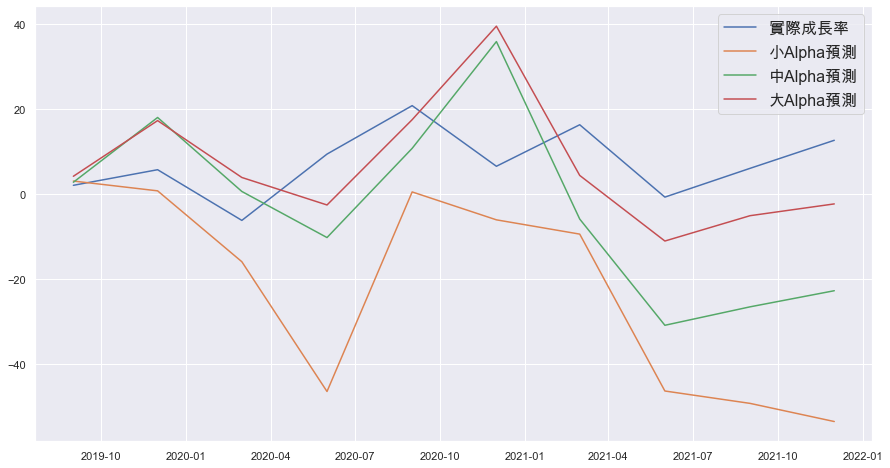

In [17]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

plt.figure(figsize=(15,8))

plt.plot(final['實際經濟成長率'])
plt.plot(final['小Alpha預測值'])
plt.plot(final['中Alpha預測值'])
plt.plot(final['大Alpha預測值'])

plt.legend(('實際成長率', '小Alpha預測', '中Alpha預測', '大Alpha預測'), fontsize=16)

In [18]:
# 重新擬合一次模型
lasso = Lasso(alpha = 1000)
mdl = lasso.fit(df_train,growth_train)

# 列出係數大於0的變數
lasso_coefs = pd.Series(dict(zip(list(df_valid), mdl.coef_)))
coefs = pd.DataFrame(dict(Coefficient=lasso_coefs))
coid = coefs[coefs['Coefficient'] > 0].index

# 回傳變數代號尋找中文名稱
factor[factor['總經代碼'].isin(coid)]

/Users/wujinru/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76.94471653959761, tolerance: 0.3153732209408
  model = cd_fast.enet_coordinate_descent(


,總經代碼,中文全稱
25,MC2104,台灣長期外債餘額
64,MD6317,台灣-國際收支-金融帳-證券投資-股權及投資基金-資產-BPM6-季-美元
84,MD67,台灣-BOP-CA加KA加FA-美元-BPM6-季-季-美元
233,NB0108,台灣-當期-國外移轉收入淨額-台幣-季
251,NB0501,台灣-當期-存貨變動-台幣-季
257,NB0701,台灣-當期-GDP-支出-貨品與勞務輸入-台幣-季
276,NB2401,台灣-當期-民間消費-交通-台幣-季
311,NC1706,台灣-實質-GDP-產業-教育服務業(2016=100)-台幣-季
345,ND0803,台灣-實質-國外要素所得淨額(2016=100)-台幣-季
